In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
def Machine(x, w, b):
  y_hat  = (w * x) + b
  return y_hat

In [5]:
x = np.array([1,3,5,7,9])
w = 2
b = 1

In [6]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

In [7]:
def Gradient(x , y, w, b):
  y_hat = Machine(x, w, b)
  
  dw = np.mean((y - y_hat) * (-2 * x))
  db = np.mean((y -y_hat) * (-2))
  
  return dw, db

In [8]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x,y,w,b)

In [9]:
print('dw is :', dw)
print('db is :', db)

dw is : 66.0
db is : 10.0


In [14]:
def Learning(x, y, w, b, step):
  dw, db =Gradient(x, y, w, b)
  uw  = w - step * dw
  ub = b - step * db
  return uw, ub

In [15]:
step  = 0.05

uw, ub = Learning(x, y, w, b, step)

In [18]:
print('update_w is:', '%.3f' % uw)
print('update_b is:', '%.3f' % ub)

update_w is: -1.300
update_b is: 0.500


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'
DATA = pd.read_csv(url)

In [21]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [22]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


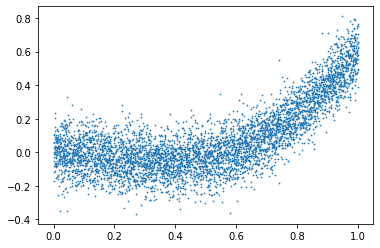

In [24]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

In [25]:
w = 2
b = .3
step = 0.05

In [27]:
for i in range(0, 1500):
  uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
  w = uw
  b = ub

In [28]:
print('Learning_w is', '%.3f' % w)
print("Learning_b is", '%.3f' % b)

Learning_w is 0.505
Learning_b is -0.170


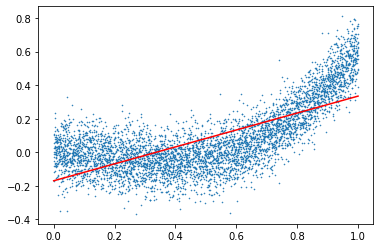

In [29]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

In [30]:
def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)
  dw = np.mean((y-y_hat) * (-2 * x))
  db = np.mean((y - y_hat)*(-2))
  MSE = np.mean((y - y_hat) ** 2)

  return dw, db, MSE

In [40]:
def Learning(x, y, w, b, step):
  dw, db, MSE = Gradient(x, y, w, b)
  uw = w - step * dw
  ub = b - step * db
  return uw, ub, MSE

In [41]:
w = 2
b = 3
step = 0.001
mse = []

In [42]:
for i in range(0, 1500):
  uw, ub, MSE = Learning(DATA.inputs, DATA.outputs, w, b, step)

  w = uw
  b = ub
  mse.append(MSE)

In [43]:
mse[0 : 10]

[15.595575679087718,
 15.51649361545252,
 15.43781315527885,
 15.359532259084672,
 15.281648897745166,
 15.204161052440112,
 15.127066714601563,
 15.050363885861781,
 14.974050578001444,
 14.8981248128981]

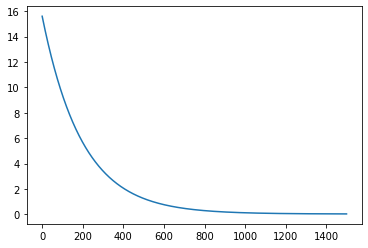

In [45]:
plt.plot(mse)
plt.show()

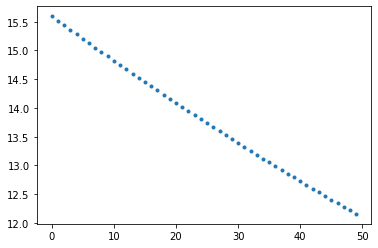

In [46]:
plt.plot(mse[0:50],'.')
plt.show()

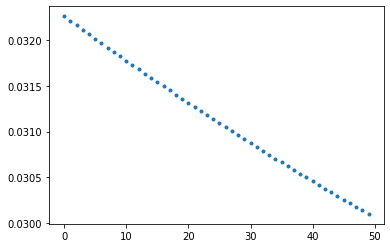

In [47]:
plt.plot(mse[1450:1500],'.')
plt.show()